<a href="https://colab.research.google.com/github/gustavohroos/CNC/blob/main/Relatorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 4 Cálculo Numérico Computacional

---

Nome: Gustavo Henrique Roos <br/>
Matrícula: 20101184

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set()

# Integração

In [2]:
def trapezoidal(f, a, b, n):
    h = (b - a) / n
    x = [a + i*h for i in range(n+1)]
    fx = [f(x_i) for x_i in x]
    return h/2 * (fx[0] + 2*sum(fx[1:n]) + fx[n])

In [3]:
def simpson_13(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("O número de subintervalos deve ser par.")
    h = (b - a) / n
    x = [a + i*h for i in range(n+1)]
    fx = [f(x_i) for x_i in x]
    return h/3 * (fx[0] + 4*sum(fx[1:n:2]) + 2*sum(fx[2:n:2]) + fx[n])

In [4]:
def simpson_38(f, a, b, n):
    if n % 3 != 0:
        raise ValueError("O número de subintervalos deve ser múltiplo de 3.")
    h = (b - a) / n
    x = [a + i*h for i in range(n+1)]
    fx = [f(x_i) for x_i in x]
    return 3*h/8 * (fx[0] + 3*sum(fx[1:n:3]) + 3*sum(fx[2:n:3]) + 2*sum(fx[3:n:3]) + fx[n])

# Diferenciação

In [5]:
def euler(f, x0, y0, h, n):
    x = [x0 + i*h for i in range(n+1)]
    y = [y0]
    for i in range(n):
        y.append(y[-1] + h*f(x[i], y[-1]))
    return x, y

In [6]:
def runge_kutta(f, x0, y0, h, n):
    x = [x0 + i*h for i in range(n+1)]
    y = [y0]
    for i in range(n):
        k1 = h*f(x[i], y[-1])
        k2 = h*f(x[i] + h/2, y[-1] + k1/2)
        k3 = h*f(x[i] + h/2, y[-1] + k2/2)
        k4 = h*f(x[i] + h, y[-1] + k3)
        y.append(y[-1] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
    return x, y

# Relatório

## 1)

In [7]:
x_arr = np.array([0, 2.5, 5, 15, 20, 25, 30])
Fx = np.array([0, 7, 9, 14, 10.5, 12, 5])
thetax = np.array([0.5, 0.9, 1.4, 0.9, 1.3, 1.48, 1.5])

def F(x):
    return Fx[np.searchsorted(x_arr, x)]

def theta(x):
    return thetax[np.searchsorted(x_arr, x)]

def func_1(x):
    return F(x) * np.cos(theta(x))

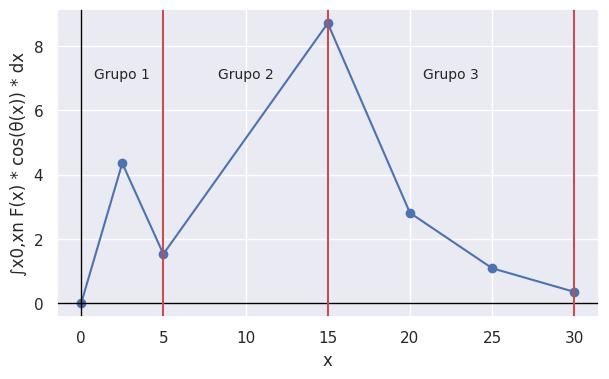

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))


ax.plot(x_arr, func_1(x_arr))
ax.scatter(x_arr, func_1(x_arr))

ax.axhline(y=0, color='#000', linewidth=1)
ax.axvline(x=0, color='#000', linewidth=1)

ax.axvline(x=5, color='r')
ax.axvline(x=15, color='r')
ax.axvline(x=30, color='r')

ax.annotate('Grupo 1', (2.5, 7), ha='center', fontsize=10)
ax.annotate('Grupo 2', (10, 7), ha='center', fontsize=10)
ax.annotate('Grupo 3', (22.5, 7), ha='center', fontsize=10)


ax.set_xlabel('x')
_ = ax.set_ylabel('∫x0,xn F(x) * cos(θ(x)) * dx')


### a)

In [9]:
w_simpson13 = simpson_13(func_1, x_arr[0], x_arr[2], 2)
print(f'Trabalho realizado no grupo 1 usando\no método 1/3 de Simpson: {w_simpson13}')

Trabalho realizado no grupo 1 usando
o método 1/3 de Simpson: 15.778986164733977


### b)

In [10]:
w_trapezio = trapezoidal(func_1, x_arr[2], x_arr[3], 1)
print(f'Trabalho realizado no grupo 2 usando\no método Trapézio Repetido: {w_trapezio}')

Trabalho realizado no grupo 2 usando
o método Trapézio Repetido: 51.16121920945736


### c)

In [11]:
w_simpson38 = simpson_38(func_1, x_arr[3], x_arr[6], 3)
print(f'Trabalho realizado no grupo 3 usando\no método 3/8 de Simpson: {w_simpson38}')

Trabalho realizado no grupo 3 usando
o método 3/8 de Simpson: 38.89990714972025


In [12]:
total = np.sum([w_simpson13, w_trapezio, w_simpson38])
print(f'Trabalho total realizado: {total}')

Trabalho total realizado: 105.84011252391159


## 2)


### a)


In [13]:
def func_2(x, y):
    return x ** 2 + y ** 2

x0 = 0
y0 = 0
h = 0.1
n = 10

x_pred = 0.5

x_euler, y_euler = euler(func_2, x0, y0, h, n)
index_euler = np.searchsorted(x_euler, x_pred)

x_rk, y_rk = runge_kutta(func_2, x0, y0, h, n)
index_rk = np.searchsorted(x_rk, x_pred)


y_pred_euler = y_euler[index_euler]
y_pred_rk = y_rk[index_rk]

print("Método de Euler:       y(0.5) = ", y_euler[index_euler])
print("Método de Runge-Kutta: y(0.5) = ", y_rk[index_rk])

Método de Euler:       y(0.5) =  0.030022207380957063
Método de Runge-Kutta: y(0.5) =  0.041791288475232065


### b)

In [14]:
x0 = 0
y0 = 0
n = 10

x_pred = 0.2

x_rk_01, y_rk_01 = runge_kutta(func_2, x0, y0, 0.1, n)
index_rk_01 = np.searchsorted(x_rk_01, x_pred)

x_rk_02, y_rk_02 = runge_kutta(func_2, x0, y0, 0.2, n)
index_rk_02 = np.searchsorted(x_rk_02, x_pred)

print("Método de Runge-Kutta -> h=0.1: y(0.2) = ", y_rk_01[index_rk_01])
print("Método de Runge-Kutta -> h=0.2: y(0.2) = ", y_rk_02[index_rk_02])

Método de Runge-Kutta -> h=0.1: y(0.2) =  0.002666875369625629
Método de Runge-Kutta -> h=0.2: y(0.2) =  0.0026668666933346665
